In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os
import calendar
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process import kernels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

<ipython-input-1-48f001c69065>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [74]:
for num in range(0,2):
    df_avg = pd.read_csv("halfhourly_dataset/halfhourly_dataset/block_"+str(num)+".csv")
    df_avg = df[['tstp','LCLid','energy(kWh/hh)']]
    df_avg.reset_index()
    df_avg.to_csv("hc_"+str(num)+".csv")

fout= open("energy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,2):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [2]:
energy = pd.read_csv('energy.csv')
np.where(pd.isna(energy['energy(kWh/hh)']))

(array([], dtype=int64),)

In [3]:
housecount = energy.groupby('tstp')[['LCLid']].nunique()
housecount.sample(n=5)
len(housecount)

39340

<AxesSubplot:xlabel='tstp'>

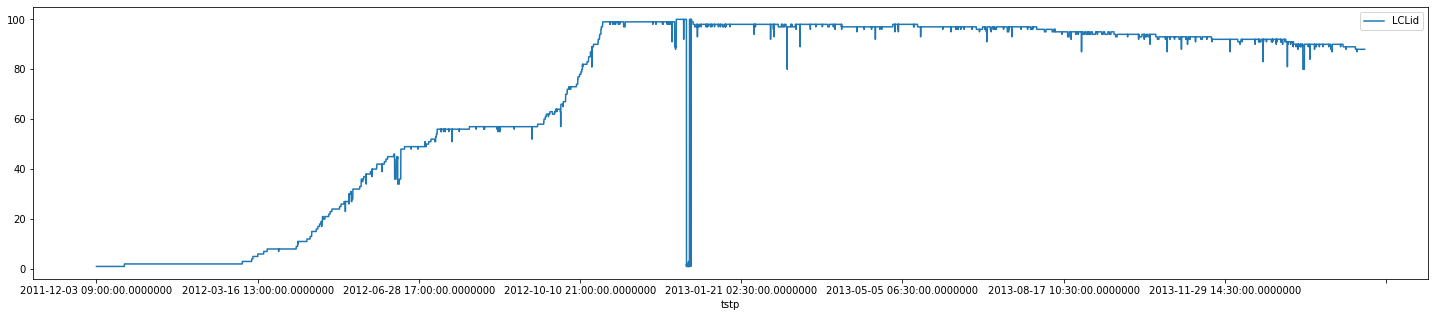

In [4]:
housecount.plot(figsize=(25,5))

In [203]:
energy = energy.groupby('tstp')[['energy(kWh/hh)']].sum()
energy = energy.merge(housecount, on = ['tstp'])
energy = energy.reset_index()

KeyboardInterrupt: 

In [6]:

for i in range(len(energy['energy(kWh/hh)'])):
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].strip()
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].replace("Null", "0")
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].split()
    energy['energy(kWh/hh)'][i] = list(dict.fromkeys(energy['energy(kWh/hh)'][i]))
energy['energy(kWh/hh)']


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\l

0                                                  [0.149]
1                                                  [0.154]
2                                                  [0.768]
3                                                  [1.179]
4                                                  [0.588]
                               ...                        
39335    [0.416, 2.4360001, 0.427, 0.163, 0.045, 0.382,...
39336    [1.35, 1.12, 1.643, 0.407, 0.134, 0.285, 0.376...
39337    [1.247, 0.701, 0.362, 0.083, 0.167, 0.728, 0.3...
39338    [1.2180001, 0.223, 0.38, 0.059, 0.021, 0.861, ...
39339    [1.387, 0.145, 0.277, 0.089, 0.039, 0.464, 0.0...
Name: energy(kWh/hh), Length: 39340, dtype: object

In [7]:
energy['energy(kWh/hh)'].fillna("0", inplace = True)
energy['energy(kWh/hh)'] = energy['energy(kWh/hh)'].apply(pd.to_numeric)

In [8]:
for i in range(len(energy['energy(kWh/hh)'])):
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].sum()
    

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
energy.count()

tstp              39340
energy(kWh/hh)    39340
LCLid             39340
dtype: int64

In [10]:
energy['avg_energy'] =  energy['energy(kWh/hh)']/energy['LCLid']

In [ ]:
#Unused cell
for i in range(len(energy['energy(kWh/hh)'])):
    if energy['LCLid'][i] == 1:
        energy['avg_energy'][i]=energy['avg_energy'][i]/2
        energy['energy(kWh/hh)'][i]=energy['energy(kWh/hh)'][i]/2

In [11]:
pd.to_datetime(energy['tstp'])

0       2011-12-03 09:00:00
1       2011-12-03 09:30:00
2       2011-12-03 10:00:00
3       2011-12-03 10:30:00
4       2011-12-03 11:00:00
                ...        
39335   2014-02-27 22:00:00
39336   2014-02-27 22:30:00
39337   2014-02-27 23:00:00
39338   2014-02-27 23:30:00
39339   2014-02-28 00:00:00
Name: tstp, Length: 39340, dtype: datetime64[ns]

In [12]:
energy['tstp'] = energy['tstp'].astype('datetime64[s]')

In [13]:
energy

,tstp,energy(kWh/hh),LCLid,avg_energy
0,2011-12-03 09:00:00,0.149,1,0.149000
1,2011-12-03 09:30:00,0.154,1,0.154000
2,2011-12-03 10:00:00,0.768,1,0.768000
3,2011-12-03 10:30:00,1.179,1,1.179000
4,2011-12-03 11:00:00,0.588,1,0.588000
...,...,...,...,...
39335,2014-02-27 22:00:00,53.464,88,0.607545
39336,2014-02-27 22:30:00,50.437,88,0.573148
39337,2014-02-27 23:00:00,44.507,88,0.505761
39338,2014-02-27 23:30:00,34.791,88,0.395352


In [14]:
energy.loc[:,'datetime'] = pd.to_datetime(energy.loc[:,'tstp'], '%Y-%m-%d %H:%M:%S')
energy.loc[:,'date'] = energy.loc[:,'tstp'].dt.date
energy.loc[:,'month'] = energy.loc[:,'datetime'].dt.month
energy.loc[:,'day_of_month'] = energy.loc[:,'datetime'].dt.day
energy.loc[:,'time'] = energy.loc[:,'datetime'].dt.time
energy.loc[:,'weekday'] = energy.loc[:,'datetime'].dt.weekday

In [15]:
#TO FIX
energy.loc[:,'weekday'] = pd.Categorical(energy['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
energy.loc[:,'month'] = pd.Categorical(energy['month'], categories=calendar.month_name[1:], ordered=True)

In [16]:
energy

,tstp,energy(kWh/hh),LCLid,avg_energy,datetime,date,month,day_of_month,time,weekday
0,2011-12-03 09:00:00,0.149,1,0.149000,2011-12-03 09:00:00,2011-12-03,NaN,3,09:00:00,NaN
1,2011-12-03 09:30:00,0.154,1,0.154000,2011-12-03 09:30:00,2011-12-03,NaN,3,09:30:00,NaN
2,2011-12-03 10:00:00,0.768,1,0.768000,2011-12-03 10:00:00,2011-12-03,NaN,3,10:00:00,NaN
3,2011-12-03 10:30:00,1.179,1,1.179000,2011-12-03 10:30:00,2011-12-03,NaN,3,10:30:00,NaN
4,2011-12-03 11:00:00,0.588,1,0.588000,2011-12-03 11:00:00,2011-12-03,NaN,3,11:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...
39335,2014-02-27 22:00:00,53.464,88,0.607545,2014-02-27 22:00:00,2014-02-27,NaN,27,22:00:00,NaN
39336,2014-02-27 22:30:00,50.437,88,0.573148,2014-02-27 22:30:00,2014-02-27,NaN,27,22:30:00,NaN
39337,2014-02-27 23:00:00,44.507,88,0.505761,2014-02-27 23:00:00,2014-02-27,NaN,27,23:00:00,NaN
39338,2014-02-27 23:30:00,34.791,88,0.395352,2014-02-27 23:30:00,2014-02-27,NaN,27,23:30:00,NaN


# Single household

In [3]:
alldata = pd.read_csv("hc_0.csv")
household = "MAC000246"

df = alldata[alldata["LCLid"] == household ]
df.reset_index(drop=True, inplace=True)
print(df.head())

   Unnamed: 0                         tstp      LCLid energy(kWh/hh)
0       24141  2011-12-03 09:00:00.0000000  MAC000246         0.149 
1       24142  2011-12-03 09:30:00.0000000  MAC000246         0.154 
2       24143  2011-12-03 10:00:00.0000000  MAC000246         0.768 
3       24144  2011-12-03 10:30:00.0000000  MAC000246         1.179 
4       24145  2011-12-03 11:00:00.0000000  MAC000246         0.588 


In [4]:
df['tstp'] = df['tstp'].astype('datetime64[s]')

<ipython-input-4-8bad35e67f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tstp'] = df['tstp'].astype('datetime64[s]')


In [5]:
df.loc[:,'datetime'] = pd.to_datetime(df.loc[:,'tstp'], '%Y-%m-%d %H:%M:%S')
df.loc[:,'date'] = df.loc[:,'tstp'].dt.date
df.loc[:,'month'] = df.loc[:,'datetime'].dt.month
df.loc[:,'day_of_month'] = df.loc[:,'datetime'].dt.day
df.loc[:,'time'] = df.loc[:,'datetime'].dt.time
df.loc[:,'weekday'] = df.loc[:,'datetime'].dt.weekday

C:\Users\Public\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Public\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
del df['Unnamed: 0']
df

,tstp,LCLid,energy(kWh/hh),datetime,date,month,day_of_month,time,weekday
0,2011-12-03 09:00:00,MAC000246,0.149,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5
1,2011-12-03 09:30:00,MAC000246,0.154,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5
2,2011-12-03 10:00:00,MAC000246,0.768,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5
3,2011-12-03 10:30:00,MAC000246,1.179,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5
4,2011-12-03 11:00:00,MAC000246,0.588,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5
...,...,...,...,...,...,...,...,...,...
39240,2014-02-27 22:00:00,MAC000246,2.4360001,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3
39241,2014-02-27 22:30:00,MAC000246,1.12,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3
39242,2014-02-27 23:00:00,MAC000246,0.701,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3
39243,2014-02-27 23:30:00,MAC000246,0.223,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3


In [7]:
energy.count()

Unnamed: 0        3961205
tstp              3961205
LCLid             3961205
energy(kWh/hh)    3961205
dtype: int64

In [8]:


print('Earliest date:', df.date.min())
print('Latest date:', df.date.max())



Earliest date: 2011-12-03
Latest date: 2014-02-28


In [9]:
df = df[df["energy(kWh/hh)"] != "Null"]
df.loc[:,"energy"] = df["energy(kWh/hh)"].astype("float64")

C:\Users\Public\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Public\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df

,tstp,LCLid,energy(kWh/hh),datetime,date,month,day_of_month,time,weekday,energy
0,2011-12-03 09:00:00,MAC000246,0.149,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,0.149
1,2011-12-03 09:30:00,MAC000246,0.154,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,0.154
2,2011-12-03 10:00:00,MAC000246,0.768,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5,0.768
3,2011-12-03 10:30:00,MAC000246,1.179,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5,1.179
4,2011-12-03 11:00:00,MAC000246,0.588,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5,0.588
...,...,...,...,...,...,...,...,...,...,...
39240,2014-02-27 22:00:00,MAC000246,2.4360001,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3,2.436
39241,2014-02-27 22:30:00,MAC000246,1.12,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3,1.120
39242,2014-02-27 23:00:00,MAC000246,0.701,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3,0.701
39243,2014-02-27 23:30:00,MAC000246,0.223,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3,0.223


# Weather info

In [11]:
weather = pd.read_csv('weather_hourly_darksky.csv')
weather.head(4)

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy


In [12]:
weather.describe()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,21165.000000,21165.000000,21165.000000,21165.000000,21152.000000,21165.000000,21165.000000,21165.000000
mean,11.166485,195.685897,10.471486,6.530501,1014.125153,9.230338,3.905215,0.781829
std,3.099337,90.629453,5.781904,5.041965,11.388337,6.940919,2.026854,0.140369
min,0.180000,0.000000,-5.640000,-9.980000,975.740000,-8.880000,0.040000,0.230000
25%,10.120000,121.000000,6.470000,2.820000,1007.430000,3.900000,2.420000,0.700000
50%,12.260000,217.000000,9.930000,6.570000,1014.780000,9.360000,3.680000,0.810000
75%,13.080000,256.000000,14.310000,10.330000,1022.050000,14.320000,5.070000,0.890000
max,16.090000,359.000000,32.400000,19.880000,1043.320000,32.420000,14.800000,1.000000


In [13]:
pd.to_datetime(weather['time'])
weather = weather[['temperature', 'windBearing', 'dewPoint', 'windSpeed',
       'pressure', 'visibility', 'humidity', 'apparentTemperature','time']]
weather.rename(columns = {'time':'tstp'}, inplace = True)
weather = weather.dropna()
weather

,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,tstp
0,10.24,104,8.86,2.77,1016.76,5.97,0.91,10.24,2011-11-11 00:00:00
1,9.76,99,8.83,2.95,1016.63,4.88,0.94,8.24,2011-11-11 01:00:00
2,9.46,98,8.79,3.17,1016.36,3.70,0.96,7.76,2011-11-11 02:00:00
3,9.23,99,8.63,3.25,1016.28,3.12,0.96,7.44,2011-11-11 03:00:00
4,9.26,111,9.21,3.70,1015.98,1.85,1.00,7.24,2011-11-11 04:00:00
...,...,...,...,...,...,...,...,...,...
21160,7.39,247,3.06,6.08,997.07,12.68,0.74,3.91,2014-02-15 19:00:00
21161,6.56,249,2.76,5.61,998.15,13.78,0.77,3.03,2014-02-15 20:00:00
21162,6.47,248,2.71,5.25,999.28,14.31,0.77,3.06,2014-02-15 21:00:00
21163,5.96,248,2.69,4.69,1000.33,14.31,0.80,2.68,2014-02-15 22:00:00


In [14]:
pd.to_datetime(weather['tstp'])
weather['tstp'] = weather['tstp'].astype('datetime64[s]')

In [15]:
weather2 = weather.copy()
weather2['tstp'] = weather2['tstp'] + pd.Timedelta(minutes = 30)
weather2

,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,tstp
0,10.24,104,8.86,2.77,1016.76,5.97,0.91,10.24,2011-11-11 00:30:00
1,9.76,99,8.83,2.95,1016.63,4.88,0.94,8.24,2011-11-11 01:30:00
2,9.46,98,8.79,3.17,1016.36,3.70,0.96,7.76,2011-11-11 02:30:00
3,9.23,99,8.63,3.25,1016.28,3.12,0.96,7.44,2011-11-11 03:30:00
4,9.26,111,9.21,3.70,1015.98,1.85,1.00,7.24,2011-11-11 04:30:00
...,...,...,...,...,...,...,...,...,...
21160,7.39,247,3.06,6.08,997.07,12.68,0.74,3.91,2014-02-15 19:30:00
21161,6.56,249,2.76,5.61,998.15,13.78,0.77,3.03,2014-02-15 20:30:00
21162,6.47,248,2.71,5.25,999.28,14.31,0.77,3.06,2014-02-15 21:30:00
21163,5.96,248,2.69,4.69,1000.33,14.31,0.80,2.68,2014-02-15 22:30:00


In [16]:
weather = weather.append(weather2, ignore_index=True)
weather.loc[:,'datetime'] = pd.to_datetime(weather.loc[:,'tstp'], '%Y-%m-%d %H:%M:%S')
weather.loc[:,'date'] = weather.loc[:,'tstp'].dt.date
weather.loc[:,'time'] = weather.loc[:,'datetime'].dt.time
weather.loc[:,'hour'] = weather.loc[:,'datetime'].dt.hour
weather.loc[:,'minute'] = weather.loc[:,'datetime'].dt.minute
weather.sort_values(by = ['date','time'])
del weather['date']
del weather['time']
del weather['datetime']

# # Merge with single household data

In [17]:
weather_energy =  df.merge(weather,on='tstp')
weather_energy

,tstp,LCLid,energy(kWh/hh),datetime,date,month,day_of_month,time,weekday,energy,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,hour,minute
0,2011-12-03 09:00:00,MAC000246,0.149,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,0.149,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00,9,0
1,2011-12-03 09:30:00,MAC000246,0.154,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,0.154,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00,9,30
2,2011-12-03 10:00:00,MAC000246,0.768,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5,0.768,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42,10,0
3,2011-12-03 10:30:00,MAC000246,1.179,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5,1.179,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42,10,30
4,2011-12-03 11:00:00,MAC000246,0.588,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5,0.588,11.41,274,6.39,6.20,1003.24,13.07,0.71,11.41,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39213,2014-02-27 22:00:00,MAC000246,2.4360001,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3,2.436,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41,22,0
39214,2014-02-27 22:30:00,MAC000246,1.12,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3,1.120,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41,22,30
39215,2014-02-27 23:00:00,MAC000246,0.701,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3,0.701,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42,23,0
39216,2014-02-27 23:30:00,MAC000246,0.223,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3,0.223,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42,23,30


# # Merge with averaged energy

In [23]:
weather_energy =  energy.merge(weather,on='tstp')
weather_energy

,tstp,energy(kWh/hh),LCLid,avg_energy,datetime,date,month,day_of_month,time,weekday,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature
0,2011-12-03 09:00:00,0.149,1,0.149000,2011-12-03 09:00:00,2011-12-03,NaN,3,09:00:00,NaN,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00
1,2011-12-03 09:30:00,0.154,1,0.154000,2011-12-03 09:30:00,2011-12-03,NaN,3,09:30:00,NaN,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00
2,2011-12-03 10:00:00,0.768,1,0.768000,2011-12-03 10:00:00,2011-12-03,NaN,3,10:00:00,NaN,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42
3,2011-12-03 10:30:00,1.179,1,1.179000,2011-12-03 10:30:00,2011-12-03,NaN,3,10:30:00,NaN,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42
4,2011-12-03 11:00:00,0.588,1,0.588000,2011-12-03 11:00:00,2011-12-03,NaN,3,11:00:00,NaN,11.41,274,6.39,6.20,1003.24,13.07,0.71,11.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,2014-02-27 22:00:00,53.464,88,0.607545,2014-02-27 22:00:00,2014-02-27,NaN,27,22:00:00,NaN,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41
39217,2014-02-27 22:30:00,50.437,88,0.573148,2014-02-27 22:30:00,2014-02-27,NaN,27,22:30:00,NaN,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41
39218,2014-02-27 23:00:00,44.507,88,0.505761,2014-02-27 23:00:00,2014-02-27,NaN,27,23:00:00,NaN,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42
39219,2014-02-27 23:30:00,34.791,88,0.395352,2014-02-27 23:30:00,2014-02-27,NaN,27,23:30:00,NaN,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42


In [18]:
weather_energy.head(2)

,tstp,LCLid,energy(kWh/hh),datetime,date,month,day_of_month,time,weekday,energy,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,hour,minute
0,2011-12-03 09:00:00,MAC000246,0.149,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,0.149,11.0,262,8.84,5.99,1002.07,13.07,0.87,11.0,9,0
1,2011-12-03 09:30:00,MAC000246,0.154,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,0.154,11.0,262,8.84,5.99,1002.07,13.07,0.87,11.0,9,30


In [19]:
weather_energy.rename(columns = {'energy(kWh/hh)':'en_consum'}, inplace = True)

In [20]:
del weather_energy['en_consum']

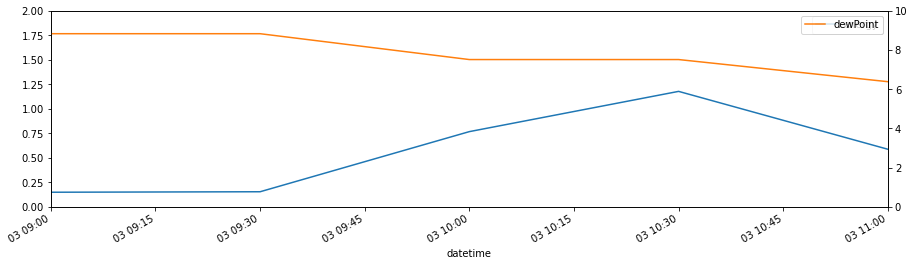

In [21]:
#FOR LATER USE!
fig, axes = plt.subplots(nrows=1, ncols=1)
weather_energy.plot(x = "datetime",y="energy", figsize=(15, 4),ylim = (0,2), xlim=('2011-12-03 09:00:00', '2011-12-03 11:00:00'), ax = axes)
axes = axes.twinx()
weather_energy.plot(x = "datetime",y=["dewPoint"], figsize=(15, 4),ylim = (0,10), xlim=('2011-12-03 09:00:00', '2011-12-03 11:00:00'), color = 'tab:orange', ax = axes)
plt.show()

In [22]:
weather_energy['avg_energy'] = pd.to_numeric(weather_energy['avg_energy'])
weather_energy['en_consum'] = pd.to_numeric(weather_energy['en_consum'])

KeyError: 'avg_energy'

In [22]:
weather_energy.dtypes

tstp                   datetime64[ns]
LCLid                          object
datetime               datetime64[ns]
date                           object
month                           int64
day_of_month                    int64
time                           object
weekday                         int64
energy                        float64
temperature                   float64
windBearing                     int64
dewPoint                      float64
windSpeed                     float64
pressure                      float64
visibility                    float64
humidity                      float64
apparentTemperature           float64
hour                            int64
minute                          int64
dtype: object

In [23]:
cor_matrix = weather_energy[['energy','temperature', 'windBearing', 'dewPoint', 'windSpeed',
       'pressure', 'visibility', 'humidity', 'apparentTemperature']].corr()
cor_matrix

,energy,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature
energy,1.000000,-0.101153,-0.003697,-0.072062,-0.020456,-0.047367,0.003824,0.060608,-0.097461
temperature,-0.101153,1.000000,0.049360,0.850080,0.039209,0.050945,0.244438,-0.424242,0.987054
windBearing,-0.003697,0.049360,1.000000,0.056072,0.062963,-0.012744,0.202628,-0.007041,0.054672
dewPoint,-0.072062,0.850080,0.056072,1.000000,-0.039092,-0.052573,-0.008385,0.108915,0.862414
windSpeed,-0.020456,0.039209,0.062963,-0.039092,1.000000,-0.379709,0.219631,-0.175521,-0.038101
pressure,-0.047367,0.050945,-0.012744,-0.052573,-0.379709,1.000000,0.009621,-0.183377,0.082473
visibility,0.003824,0.244438,0.202628,-0.008385,0.219631,0.009621,1.000000,-0.525608,0.201381
humidity,0.060608,-0.424242,-0.007041,0.108915,-0.175521,-0.183377,-0.525608,1.000000,-0.377084
apparentTemperature,-0.097461,0.987054,0.054672,0.862414,-0.038101,0.082473,0.201381,-0.377084,1.000000


# Bank holidays

In [24]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays']).dt.date
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [25]:
weather_energy = weather_energy.merge(holiday, left_on = 'date',right_on = 'Bank holidays', how = 'left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [26]:
weather_energy

,tstp,LCLid,datetime,date,month,day_of_month,time,weekday,energy,temperature,...,windSpeed,pressure,visibility,humidity,apparentTemperature,hour,minute,Bank holidays,Type,holiday_ind
0,2011-12-03 09:00:00,MAC000246,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,0.149,11.00,...,5.99,1002.07,13.07,0.87,11.00,9,0,NaN,NaN,0
1,2011-12-03 09:30:00,MAC000246,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,0.154,11.00,...,5.99,1002.07,13.07,0.87,11.00,9,30,NaN,NaN,0
2,2011-12-03 10:00:00,MAC000246,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5,0.768,11.42,...,6.10,1002.76,12.76,0.77,11.42,10,0,NaN,NaN,0
3,2011-12-03 10:30:00,MAC000246,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5,1.179,11.42,...,6.10,1002.76,12.76,0.77,11.42,10,30,NaN,NaN,0
4,2011-12-03 11:00:00,MAC000246,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5,0.588,11.41,...,6.20,1003.24,13.07,0.71,11.41,11,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39213,2014-02-27 22:00:00,MAC000246,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3,2.436,4.10,...,3.02,1005.67,14.00,0.84,1.41,22,0,NaN,NaN,0
39214,2014-02-27 22:30:00,MAC000246,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3,1.120,4.10,...,3.02,1005.67,14.00,0.84,1.41,22,30,NaN,NaN,0
39215,2014-02-27 23:00:00,MAC000246,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3,0.701,3.93,...,2.75,1004.62,14.03,0.85,1.42,23,0,NaN,NaN,0
39216,2014-02-27 23:30:00,MAC000246,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3,0.223,3.93,...,2.75,1004.62,14.03,0.85,1.42,23,30,NaN,NaN,0


# ACORN data

In [27]:
house_info = pd.read_csv('informations_households.csv')

In [28]:
house_info

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [29]:
LCLids_del = house_info.loc[house_info.Acorn == 'ACORN-'].LCLid.values
LCLids_del

array(['MAC005492', 'MAC001074'], dtype=object)

In [30]:
#Delete these houses from the current block being analysed
for i in range (0,len(LCLids_del)): 
    if any(weather_energy.LCLid == LCLids_del[i]):
        weather_energy = weather_energy.loc [weather_energy.LCLid != LCLids_del[i]]
        print(i)

In [31]:
weather_energy_info = weather_energy.merge(house_info, on = 'LCLid')

In [32]:
del weather_energy_info['file']

In [33]:
weather_energy_info

,tstp,LCLid,datetime,date,month,day_of_month,time,weekday,energy,temperature,...,humidity,apparentTemperature,hour,minute,Bank holidays,Type,holiday_ind,stdorToU,Acorn,Acorn_grouped
0,2011-12-03 09:00:00,MAC000246,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,0.149,11.00,...,0.87,11.00,9,0,NaN,NaN,0,Std,ACORN-A,Affluent
1,2011-12-03 09:30:00,MAC000246,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,0.154,11.00,...,0.87,11.00,9,30,NaN,NaN,0,Std,ACORN-A,Affluent
2,2011-12-03 10:00:00,MAC000246,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5,0.768,11.42,...,0.77,11.42,10,0,NaN,NaN,0,Std,ACORN-A,Affluent
3,2011-12-03 10:30:00,MAC000246,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5,1.179,11.42,...,0.77,11.42,10,30,NaN,NaN,0,Std,ACORN-A,Affluent
4,2011-12-03 11:00:00,MAC000246,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5,0.588,11.41,...,0.71,11.41,11,0,NaN,NaN,0,Std,ACORN-A,Affluent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39213,2014-02-27 22:00:00,MAC000246,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3,2.436,4.10,...,0.84,1.41,22,0,NaN,NaN,0,Std,ACORN-A,Affluent
39214,2014-02-27 22:30:00,MAC000246,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3,1.120,4.10,...,0.84,1.41,22,30,NaN,NaN,0,Std,ACORN-A,Affluent
39215,2014-02-27 23:00:00,MAC000246,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3,0.701,3.93,...,0.85,1.42,23,0,NaN,NaN,0,Std,ACORN-A,Affluent
39216,2014-02-27 23:30:00,MAC000246,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3,0.223,3.93,...,0.85,1.42,23,30,NaN,NaN,0,Std,ACORN-A,Affluent


# Model construction

No handles with labels found to put in legend.
No handles with labels found to put in legend.


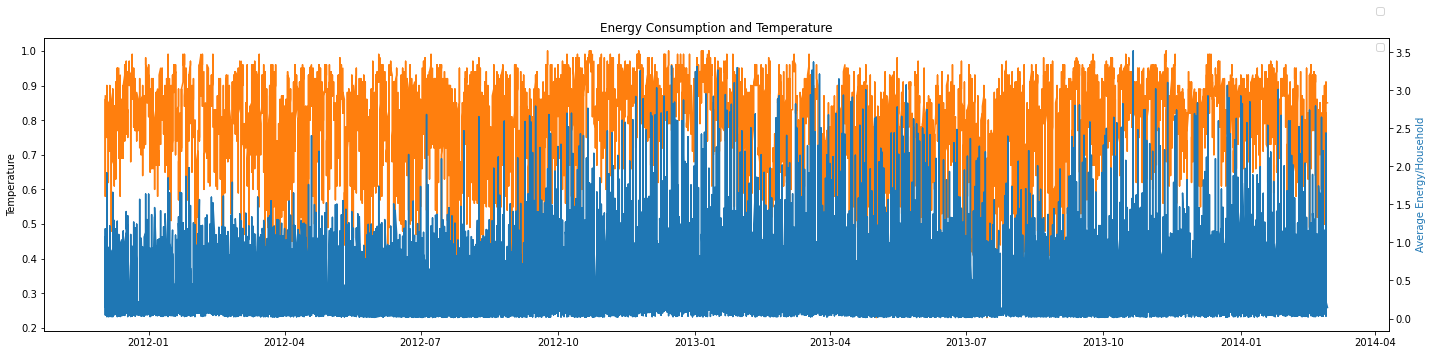

In [34]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy_info.date, weather_energy.humidity, color = 'tab:orange')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(weather_energy_info.date,weather_energy_info.energy,color = 'tab:blue')
ax2.set_ylabel('Average Energy/Household',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

In [35]:
weather_energy_info.set_index(['datetime'],inplace=True)

In [36]:
weather_energy_info

,tstp,LCLid,date,month,day_of_month,time,weekday,energy,temperature,windBearing,...,humidity,apparentTemperature,hour,minute,Bank holidays,Type,holiday_ind,stdorToU,Acorn,Acorn_grouped
datetime,,,,,,,,,,,,,,,,,,,,,
2011-12-03 09:00:00,2011-12-03 09:00:00,MAC000246,2011-12-03,12,3,09:00:00,5,0.149,11.00,262,...,0.87,11.00,9,0,NaN,NaN,0,Std,ACORN-A,Affluent
2011-12-03 09:30:00,2011-12-03 09:30:00,MAC000246,2011-12-03,12,3,09:30:00,5,0.154,11.00,262,...,0.87,11.00,9,30,NaN,NaN,0,Std,ACORN-A,Affluent
2011-12-03 10:00:00,2011-12-03 10:00:00,MAC000246,2011-12-03,12,3,10:00:00,5,0.768,11.42,268,...,0.77,11.42,10,0,NaN,NaN,0,Std,ACORN-A,Affluent
2011-12-03 10:30:00,2011-12-03 10:30:00,MAC000246,2011-12-03,12,3,10:30:00,5,1.179,11.42,268,...,0.77,11.42,10,30,NaN,NaN,0,Std,ACORN-A,Affluent
2011-12-03 11:00:00,2011-12-03 11:00:00,MAC000246,2011-12-03,12,3,11:00:00,5,0.588,11.41,274,...,0.71,11.41,11,0,NaN,NaN,0,Std,ACORN-A,Affluent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-27 22:00:00,2014-02-27 22:00:00,MAC000246,2014-02-27,2,27,22:00:00,3,2.436,4.10,216,...,0.84,1.41,22,0,NaN,NaN,0,Std,ACORN-A,Affluent
2014-02-27 22:30:00,2014-02-27 22:30:00,MAC000246,2014-02-27,2,27,22:30:00,3,1.120,4.10,216,...,0.84,1.41,22,30,NaN,NaN,0,Std,ACORN-A,Affluent
2014-02-27 23:00:00,2014-02-27 23:00:00,MAC000246,2014-02-27,2,27,23:00:00,3,0.701,3.93,200,...,0.85,1.42,23,0,NaN,NaN,0,Std,ACORN-A,Affluent


In [37]:
model_data_x = weather_energy_info[['energy','hour','minute','weekday','temperature','Acorn','dewPoint','humidity','pressure','windSpeed','holiday_ind']]
model_data_y = weather_energy_info[['energy']]
train = model_data_x
test = model_data_x[1580:2180]

<AxesSubplot:xlabel='datetime'>

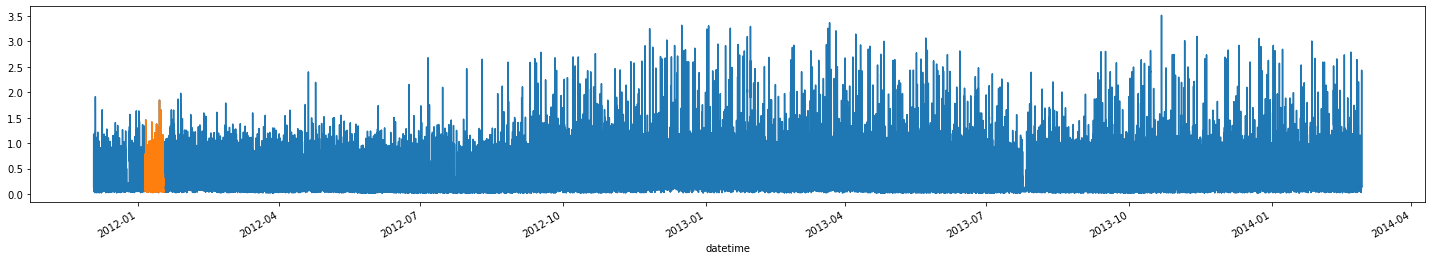

In [38]:
train['energy'].plot(figsize=(25,4))
test['energy'].plot(figsize=(25,4))

In [39]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

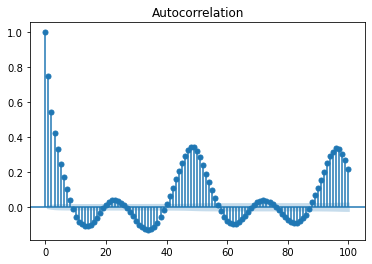

In [40]:
plot_acf(train.energy,lags=100)
plt.show()

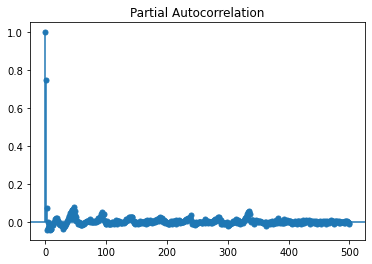

In [41]:
plot_pacf(train.energy,lags=500)
plt.show()

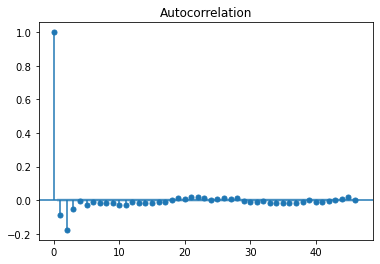

In [42]:
plot_acf(train.energy.diff().dropna())
plt.show()

In [43]:
import statsmodels.api as sm

In [44]:
train.index = pd.DatetimeIndex(train.index).to_period('30M')

In [45]:
train['time'] = train['hour'] + train['minute']/60
test['time'] = test['hour'] + test['minute']/60

<ipython-input-45-6e42456e5a5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['time'] = train['hour'] + train['minute']/60
<ipython-input-45-6e42456e5a5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['time'] = test['hour'] + test['minute']/60


In [46]:
train.dtypes
train

,energy,hour,minute,weekday,temperature,Acorn,dewPoint,humidity,pressure,windSpeed,holiday_ind,time
datetime,,,,,,,,,,,,
2011-12,0.149,9,0,5,11.00,ACORN-A,8.84,0.87,1002.07,5.99,0,9.0
2011-12,0.154,9,30,5,11.00,ACORN-A,8.84,0.87,1002.07,5.99,0,9.5
2011-12,0.768,10,0,5,11.42,ACORN-A,7.52,0.77,1002.76,6.10,0,10.0
2011-12,1.179,10,30,5,11.42,ACORN-A,7.52,0.77,1002.76,6.10,0,10.5
2011-12,0.588,11,0,5,11.41,ACORN-A,6.39,0.71,1003.24,6.20,0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02,2.436,22,0,3,4.10,ACORN-A,1.64,0.84,1005.67,3.02,0,22.0
2014-02,1.120,22,30,3,4.10,ACORN-A,1.64,0.84,1005.67,3.02,0,22.5
2014-02,0.701,23,0,3,3.93,ACORN-A,1.61,0.85,1004.62,2.75,0,23.0


In [47]:
t = sm.tsa.adfuller(train.energy, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                -1.672107e+01
p-value                        1.408415e-29
#Lags Used                     4.900000e+01
Number of Observations Used    3.916800e+04
dtype: float64

In [50]:
s = sm.tsa.seasonal_decompose(train.energy[:1080], freq = 48)

<ipython-input-50-544e0753f0c8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  s = sm.tsa.seasonal_decompose(train.energy[:1080], freq = 48)


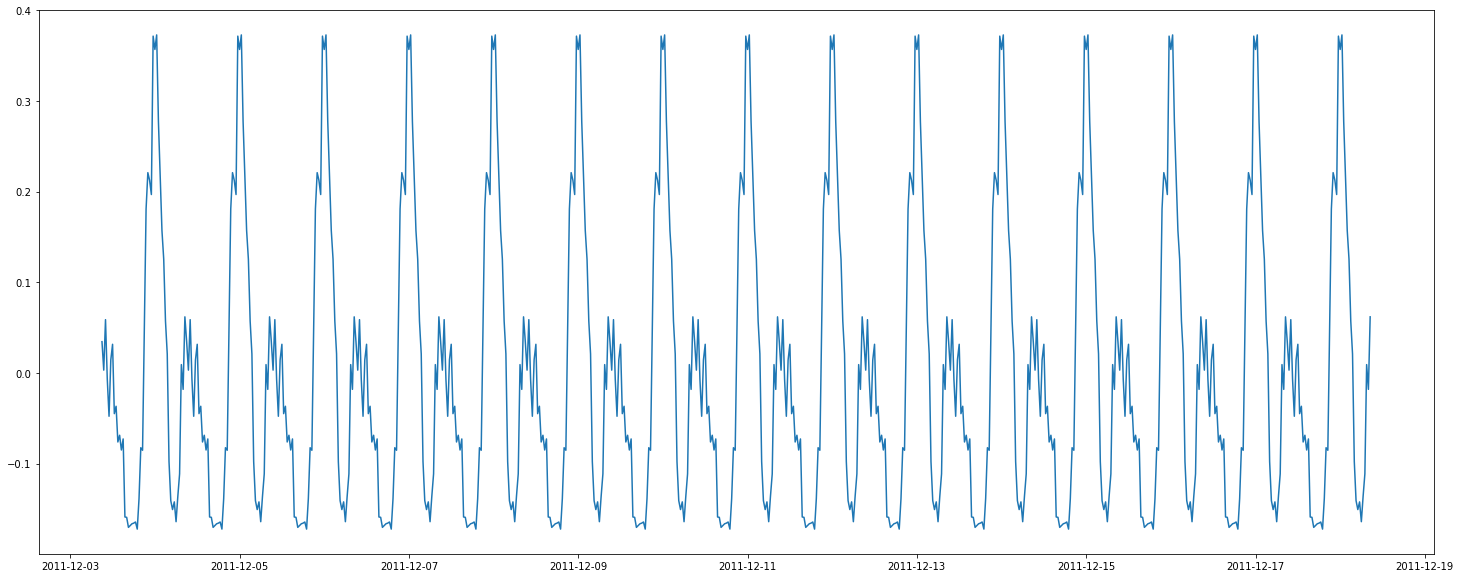

In [51]:

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(weather_energy_info['tstp'][:720], s.seasonal[:720])
#s.seasonal.plot(figsize=(20,5))



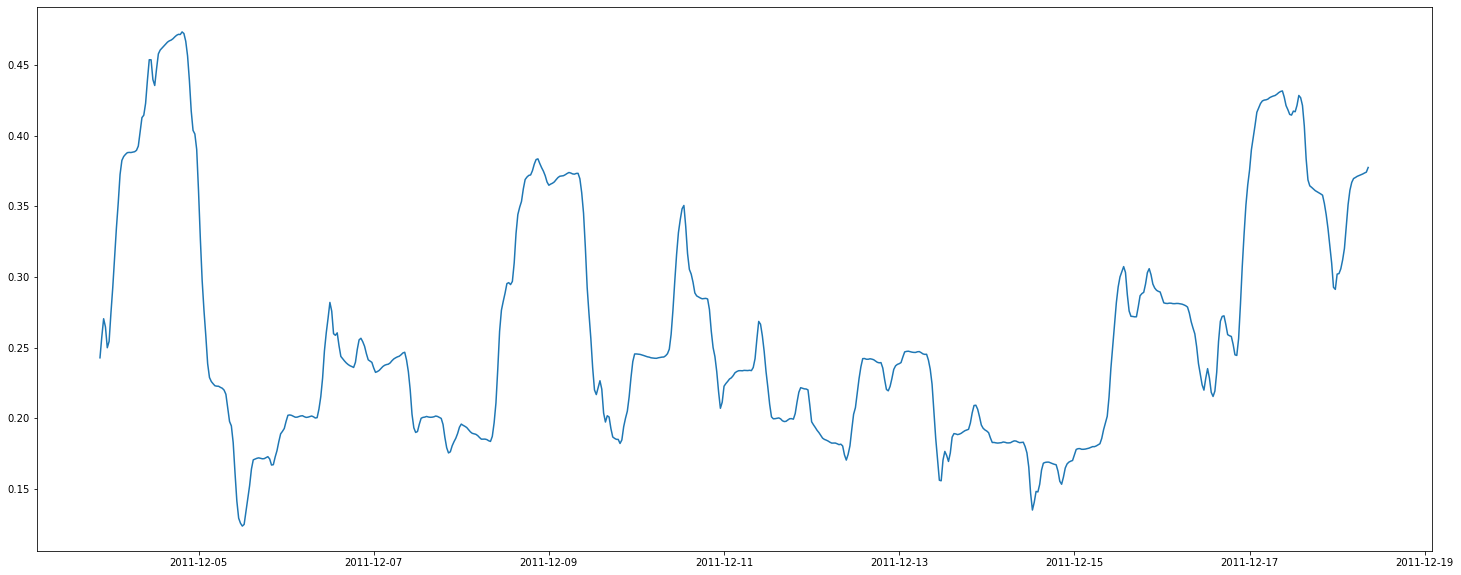

In [52]:

plt.rcParams["figure.figsize"] = (25,10)
plt.plot(weather_energy_info['tstp'][:720], s.trend[:720])



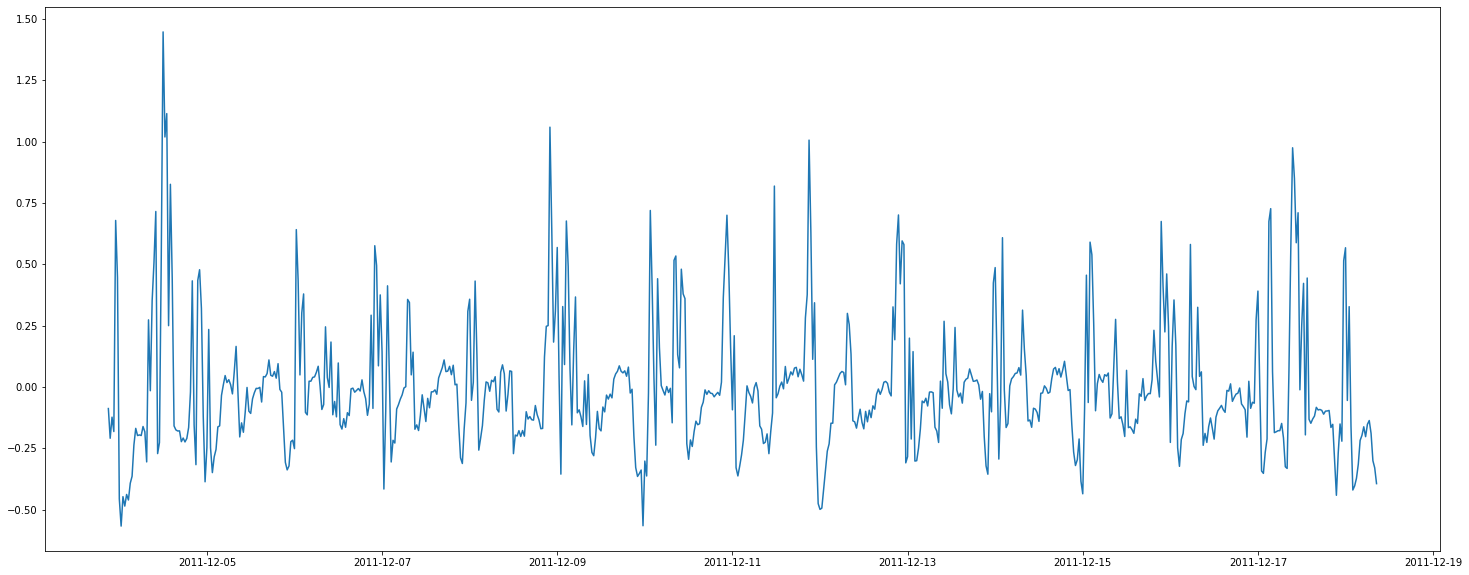

In [53]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(weather_energy_info['tstp'][:720], s.resid[:720])
#s.resid.plot(figsize=(20,5))

# #SARIMAX Model

In [73]:
endog = train['energy'][:1580]
exog = sm.add_constant(train[['temperature','time','weekday','humidity','pressure','holiday_ind']][:1580])
model = SARIMAX(endog = endog, exog = exog, order=(7,0,7),seasonal_order=(2,1, 2, 48))
model_fit = model.fit()
print(model_fit.summary())

C:\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                             energy   No. Observations:                 1580
Model:             SARIMAX(7, 1, 1)x(2, 1, 1, 48)   Log Likelihood                  62.664
Date:                            Mon, 18 Oct 2021   AIC                            -87.329
Time:                                    17:38:34   BIC                             14.011
Sample:                                12-31-2011   HQIC                           -49.614
                                     - 01-31-2012                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.583e-07   1.19e+04   1.33e-11      1.000   -2.33e+04    2.33e+04
temperature    -0.0041      0.00

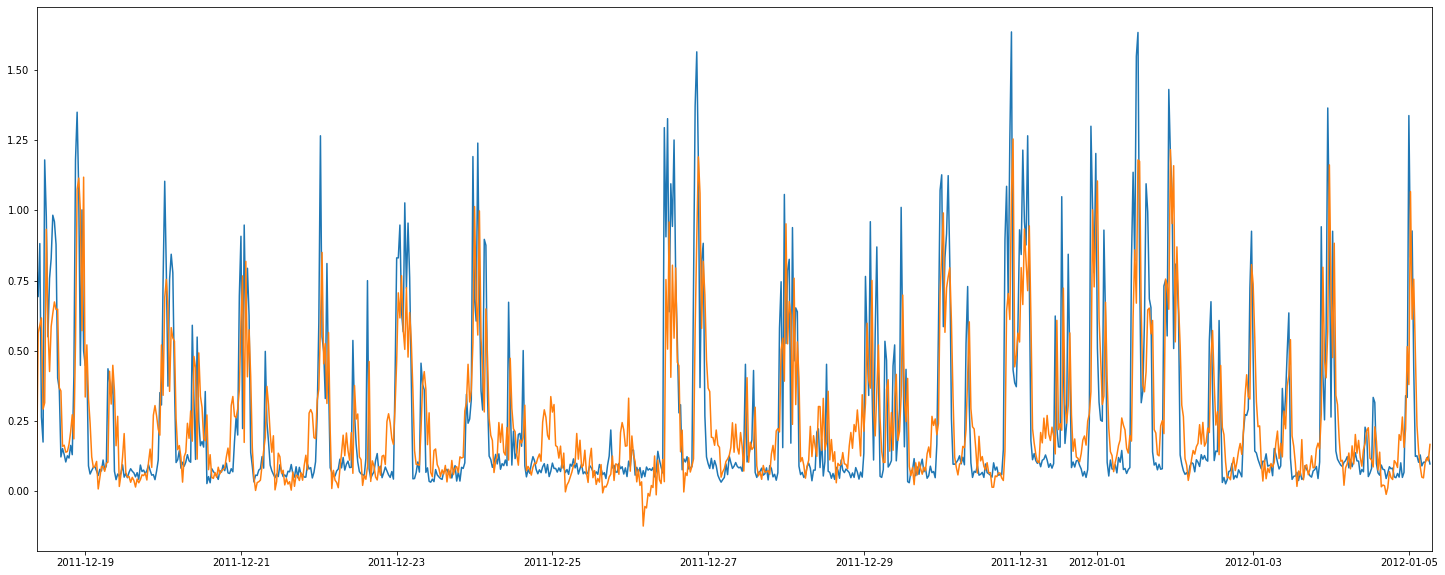

datetime
2011-12   -4.314682
2011-12    0.148998
2011-12    0.206994
2011-12    0.767998
2011-12    1.211619
             ...   
2012-01    0.047311
2012-01    0.098530
2012-01    0.118926
2012-01    0.107927
2012-01    0.166580
Freq: 30M, Length: 1580, dtype: float64


In [76]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(weather_energy_info['tstp'][720:1580], train['energy'][720:1580])
plt.plot(weather_energy_info['tstp'][720:1580], model_fit.fittedvalues[720:1580])
plt.xlim(weather_energy_info['tstp'][720], weather_energy_info['tstp'][1580])
plt.show()
print(model_fit.fittedvalues[:1580])

datetime
2011-12    4.463682
2011-12    0.005002
2011-12    0.561006
2011-12    0.411002
2011-12   -0.623619
             ...   
2012-01    0.055689
2012-01    0.004470
2012-01   -0.003926
2012-01    0.016073
2012-01   -0.069580
Freq: 30M, Length: 1580, dtype: float64


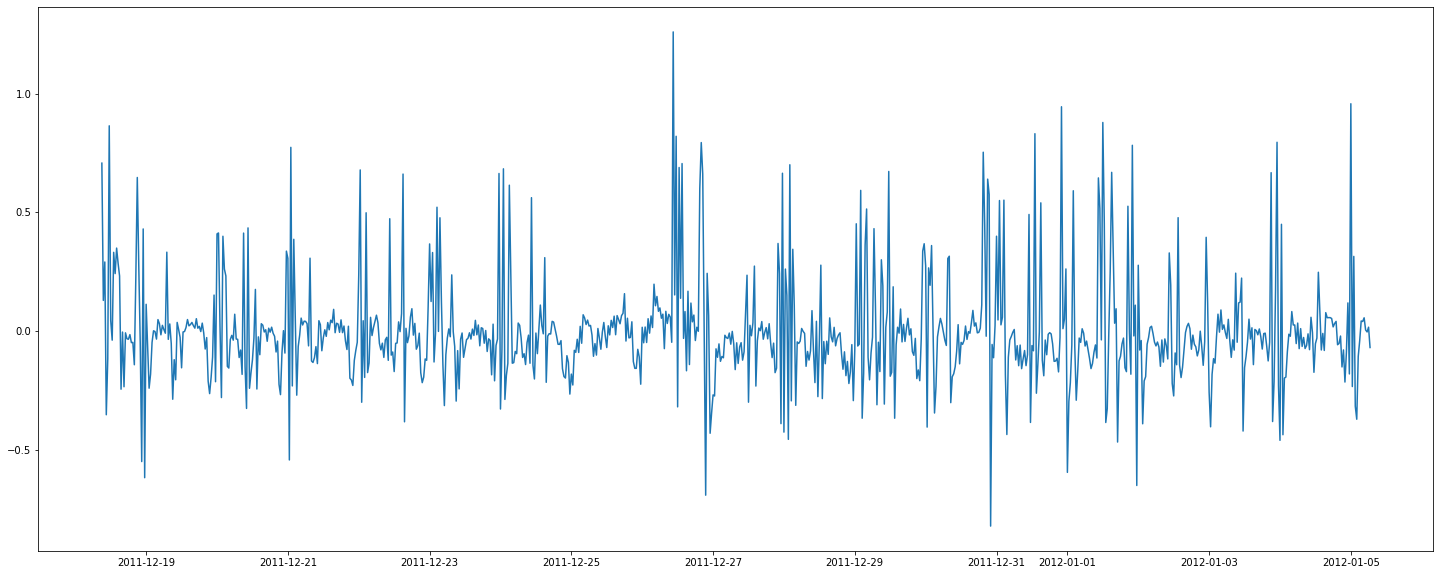

In [87]:
residuals = model_fit.resid
print(residuals)
plt.plot(weather_energy_info['tstp'][720:1580], residuals[720:1580])

datetime
2012-01-05 07:00:00    0.119
2012-01-05 07:30:00    0.065
2012-01-05 08:00:00    0.097
2012-01-05 08:30:00    0.096
2012-01-05 09:00:00    0.122
                       ...  
2012-01-17 16:30:00    0.082
2012-01-17 17:00:00    0.043
2012-01-17 17:30:00    0.076
2012-01-17 18:00:00    0.039
2012-01-17 18:30:00    0.064
Name: energy, Length: 600, dtype: float64


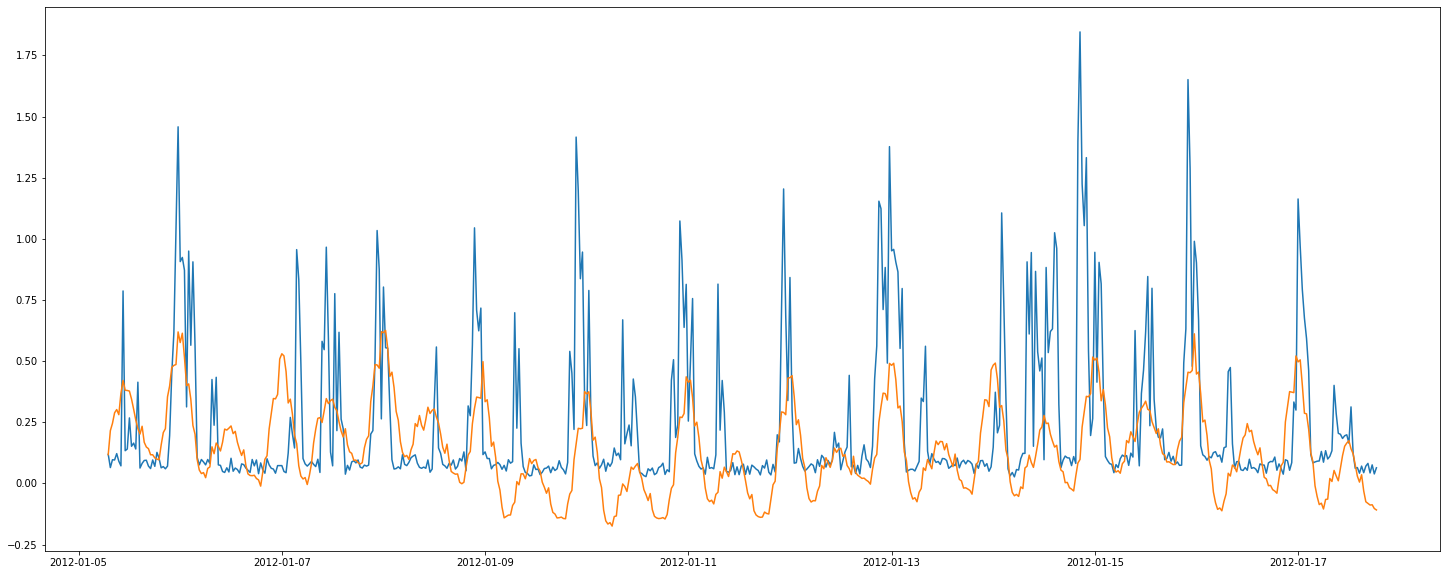

In [77]:
exog1 = sm.add_constant(test[['temperature','time','weekday','humidity','pressure','holiday_ind']])
forecasted = model_fit.forecast(600, exog = exog1, alpha=0.05) 
print(test['energy'])
plt.plot(weather_energy_info['tstp'][1580:2180],test['energy'])
plt.plot(weather_energy_info['tstp'][1580:2180], forecasted)


# #ARIMA Model

In [54]:
lags_arima = np.zeros(7*48+1)
lags_arima[0] = 1
lags_arima[1] = 1
lags_arima[47] = 1
lags_arima[48] = 1
lags_arima[48*7 - 1] = 1
lags_arima[48*7] = 1
lla = lags_arima.tolist()

In [55]:
endog = train['energy'][580:1580]
exog = sm.add_constant(train[['temperature','time','weekday','humidity','pressure','holiday_ind']][580:1580])
model_arima = SARIMAX(endog = endog, exog = exog, order=(lla,1,7), mle_regression = True)
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

C:\Users\Public\Desktop\WPy64-3950\python-3.9.5.amd64\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                          SARIMAX Results                                          
Dep. Variable:                                      energy   No. Observations:                 1000
Model:             SARIMAX([1, 2, 48, 49, 336, 337], 1, 7)   Log Likelihood                  69.788
Date:                                     Tue, 19 Oct 2021   AIC                            -97.576
Time:                                             17:44:03   BIC                              5.466
Sample:                                         12-31-2011   HQIC                           -58.411
                                              - 01-31-2012                                         
Covariance Type:                                       opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.062e-08   1.37e+04   7.73

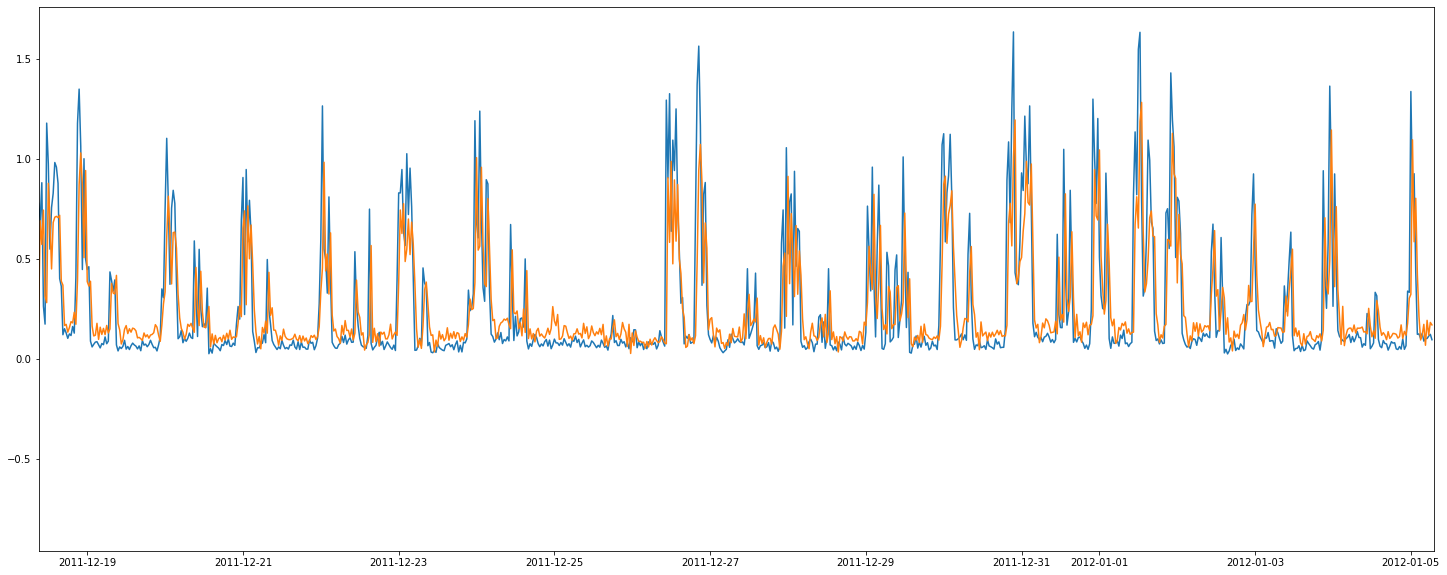

datetime
2011-12    0.182005
2011-12    0.200122
2011-12    0.185842
2011-12    0.305060
2011-12    0.070302
             ...   
2012-01    0.069333
2012-01    0.193823
2012-01    0.120192
2012-01    0.183441
2012-01    0.171046
Freq: 30M, Length: 420, dtype: float64


In [56]:
plt.rcParams["figure.figsize"] = (25,10)
plt.plot(weather_energy_info['tstp'][720:1580], train['energy'][720:1580])
plt.plot(weather_energy_info['tstp'][580:1580], model_arima_fit.fittedvalues[:1000])
plt.xlim(weather_energy_info['tstp'][720], weather_energy_info['tstp'][1580])
plt.show()
print(model_arima_fit.fittedvalues[580:1580])

datetime
2011-12    0.898852
2011-12    0.031053
2011-12    0.300616
2011-12   -0.237422
2011-12    0.021146
             ...   
2012-01    0.033667
2012-01   -0.090823
2012-01   -0.005192
2012-01   -0.059441
2012-01   -0.074046
Freq: 30M, Length: 1000, dtype: float64


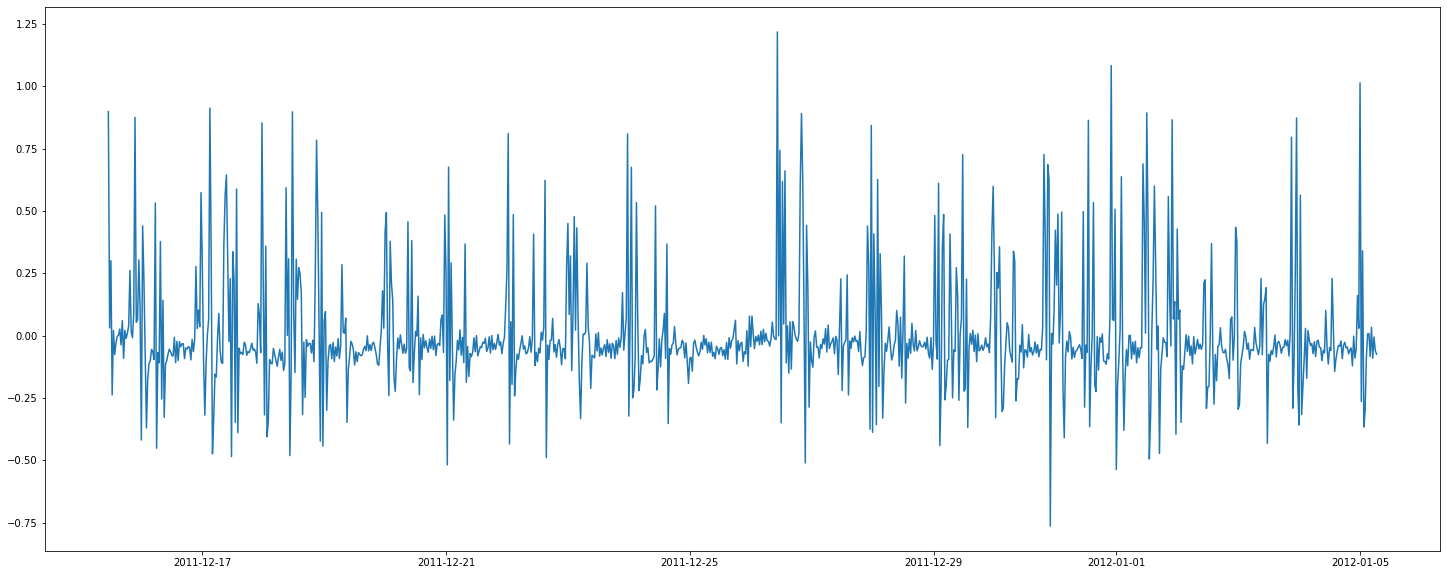

In [60]:
residuals = model_arima_fit.resid
print(residuals)
plt.plot(weather_energy_info['tstp'][580:1580], residuals)

datetime
2012-01-05 07:00:00    0.119
2012-01-05 07:30:00    0.065
2012-01-05 08:00:00    0.097
2012-01-05 08:30:00    0.096
2012-01-05 09:00:00    0.122
                       ...  
2012-01-17 16:30:00    0.082
2012-01-17 17:00:00    0.043
2012-01-17 17:30:00    0.076
2012-01-17 18:00:00    0.039
2012-01-17 18:30:00    0.064
Name: energy, Length: 600, dtype: float64


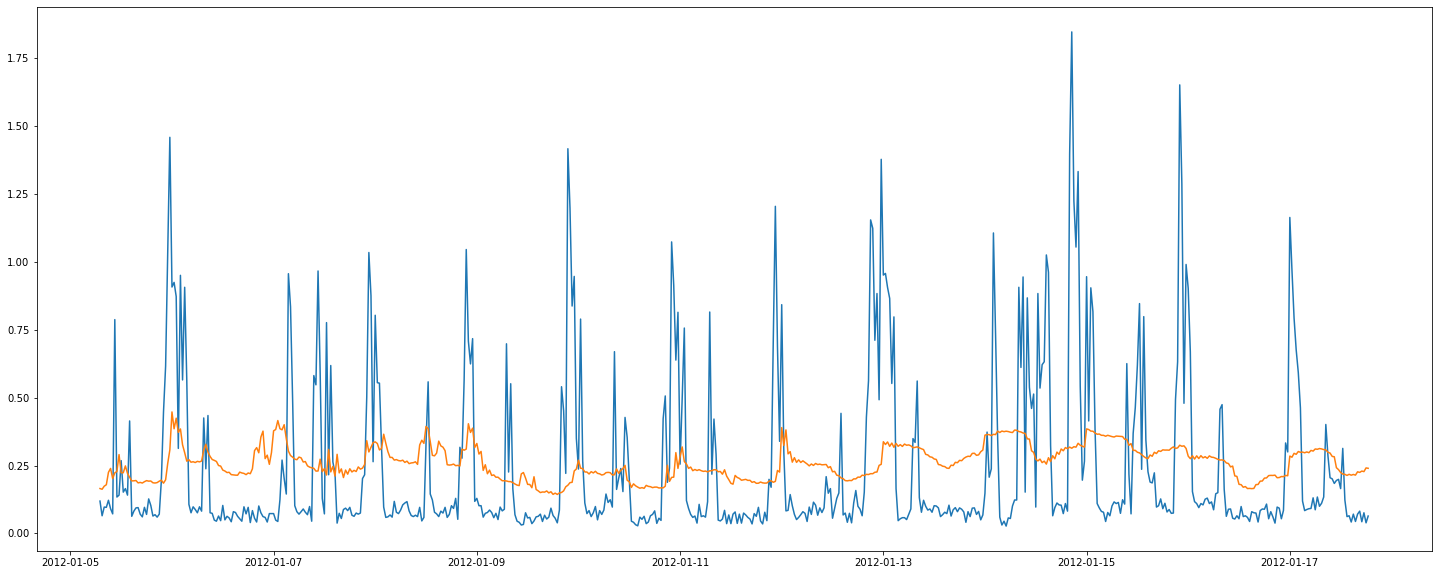

In [57]:
exog1 = sm.add_constant(test[['temperature','time','weekday','humidity','pressure','holiday_ind']])
forecasted = model_arima_fit.forecast(600, exog = exog1, alpha=0.05) 
print(test['energy'])
plt.plot(weather_energy_info['tstp'][1580:2180],test['energy'])
plt.plot(weather_energy_info['tstp'][1580:2180], forecasted)

# # GPR

In [120]:
kernels_gpr = kernels.RBF(length_scale = 48) + kernels.WhiteKernel(noise_level=0.0336)
#+ kernels.ExpSineSquared(length_scale=1.44, periodicity=48)*3.27**2 * kernels.RBF(length_scale=180)
gpr = GaussianProcessRegressor(kernel=kernels_gpr, random_state=0).fit(train[['temperature','time','weekday','humidity','pressure','holiday_ind']][:1580], train['energy'][:1580])
gprscore = gpr.score(train[['temperature','time','weekday','humidity','pressure','holiday_ind']][:1580], train['energy'][:1580])
print(gprscore)


0.7055591021288397


In [ ]:
predictions = gpr.predict(train[['temperature','time','weekday','humidity','pressure','holiday_ind']][:2160])
plt.plot(weather_energy_info['tstp'][:2160], predictions)
plt.plot(weather_energy_info['tstp'][:2160],train['energy'][:2160])

In [247]:
##TO DO LIST:
#MAKE THE PLOTS BETTER!
#FOR THE FILLER WEATHER INFO, FILL IT WITH AVERAGE VALUES